In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day9/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
import numpy as np

X = data.iloc[:,2:4].values
Y = data.iloc[:,-1].values


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

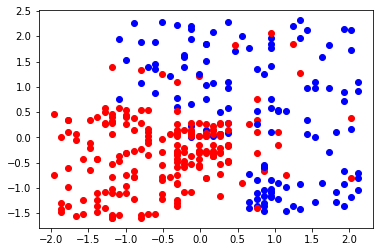

In [32]:
import matplotlib.pyplot as plt

for i in range(len(Y_train)):
  if Y_train[i] == 0:
    plt.scatter(X_train[i,0],X_train[i,1],color='red')
  else:
    plt.scatter(X_train[i,0],X_train[i,1],color='blue')

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
y_pred

count = 0
for i in range(len(y_pred)):
  if y_pred[i] == Y_test[i]:
    count += 1

accuracy = count/len(y_pred)
print(accuracy)

0.9125


In [34]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 10)
    y = np.linspace(ylim[0], ylim[1], 10)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

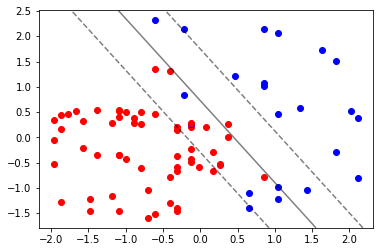

In [36]:
for i in range(len(Y_test)):
  if Y_test[i] == 0:
    plt.scatter(X_test[i,0],X_test[i,1],color='red')
  else:
    plt.scatter(X_test[i,0],X_test[i,1],color='blue')

plot_svc_decision_function(classifier)